LOADING AND READING DATASET

In [1]:
# Import Pandas as pd
import pandas as pd

# Load dataset
file_path = r'C:\Users\SusannaBeatson\Desktop\My Projects\Python - Superstore dataset\Global_Superstore.xlsx'
orders = pd.read_excel(file_path, sheet_name='Orders')
returns = pd.read_excel(file_path, sheet_name= 'Returns')
people = pd.read_excel(file_path, sheet_name= 'People')

orders.head()
#returns.head()
#people.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,ID-0,2016-01-01,2016-01-02,First Class,CUST-0,Home Office,United States,Chicago,New York,10001,East,PROD-0,Technology,Chairs,Product B,191.69,6,0.22,4.70
1,ID-1,2016-01-02,2016-01-03,Same Day,CUST-1,Consumer,United States,Houston,California,10001,West,PROD-1,Office Supplies,Chairs,Product A,460.17,7,0.05,-38.11
2,ID-2,2016-01-03,2016-01-04,Second Class,CUST-2,Consumer,United States,Los Angeles,New York,77001,West,PROD-2,Technology,Chairs,Product B,208.22,8,0.14,195.24
3,ID-3,2016-01-04,2016-01-05,First Class,CUST-3,Home Office,United States,New York,New York,60601,East,PROD-3,Technology,Chairs,Product B,373.29,1,0.04,109.61
4,ID-4,2016-01-05,2016-01-06,Same Day,CUST-4,Consumer,United States,Houston,New York,60601,South,PROD-4,Technology,Phones,Product D,86.84,8,0.11,-49.52


GROUPING AND AGGREGATION

In [2]:
# Group by category
category_summary = orders.groupby('Category')[['Sales', 'Profit']].sum().reset_index()
category_summary = category_summary.sort_values(by='Sales', ascending=False)
category_summary


,Category,Sales,Profit
0,Furniture,90063.67,25282.97
2,Technology,83805.90,25433.21
1,Office Supplies,81727.66,23480.84


BAR GRAPH COMPARING SALES AND PROFIT BY CATEGORY

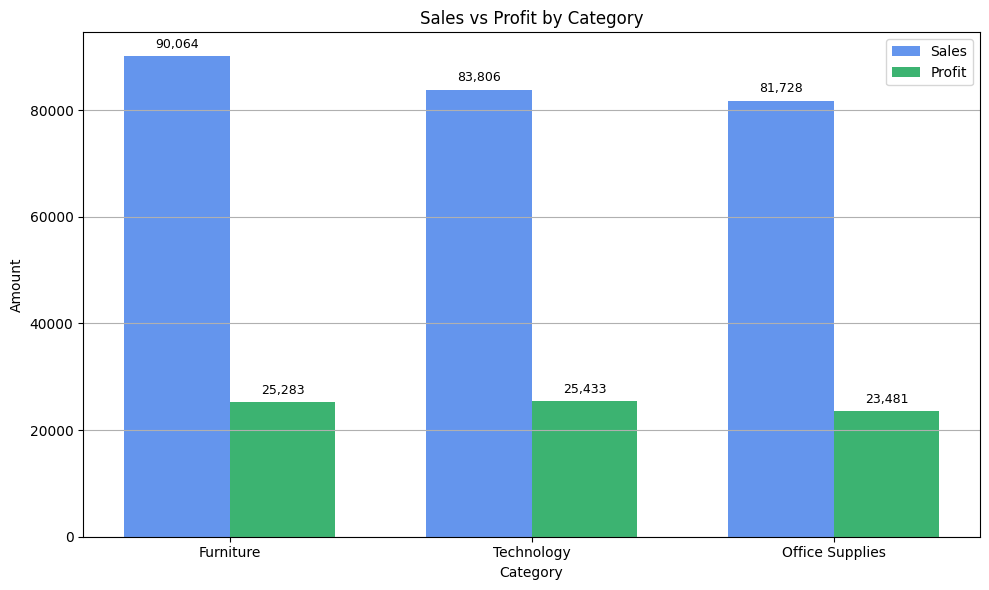

In [3]:
# Plot clustered bar graph
import numpy as np
import matplotlib.pyplot as plt

# Set up positions
x = np.arange(len(category_summary['Category']))
width = 0.35

plt.figure(figsize=(10, 6))

# Plot Sales bars
bars1 = plt.bar(x - width/2, category_summary['Sales'], width, label='Sales', color='cornflowerblue')

# Plot Profit bars
bars2 = plt.bar(x + width/2, category_summary['Profit'], width, label='Profit', color='mediumseagreen')

# Annotate Sales bars
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1000, f'{height:,.0f}',
             ha='center', va='bottom', fontsize=9)

# Annotate Profit bars
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1000, f'{height:,.0f}',
             ha='center', va='bottom', fontsize=9)

# Add chart elements
plt.title('Sales vs Profit by Category')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.xticks(x, category_summary['Category'])
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


PROFIT MARGIN

In [4]:
# Calculate Profit Margin (%)
category_summary['Profit Margin (%)'] = (category_summary['Profit'] / category_summary['Sales']) * 100
category_summary = category_summary.sort_values(by='Profit Margin (%)', ascending=False)
category_summary


,Category,Sales,Profit,Profit Margin (%)
2,Technology,83805.90,25433.21,30.347756
1,Office Supplies,81727.66,23480.84,28.730591
0,Furniture,90063.67,25282.97,28.072329


BAR GRAPH COMPARING PROFIT MARGIN BY CATEGORY

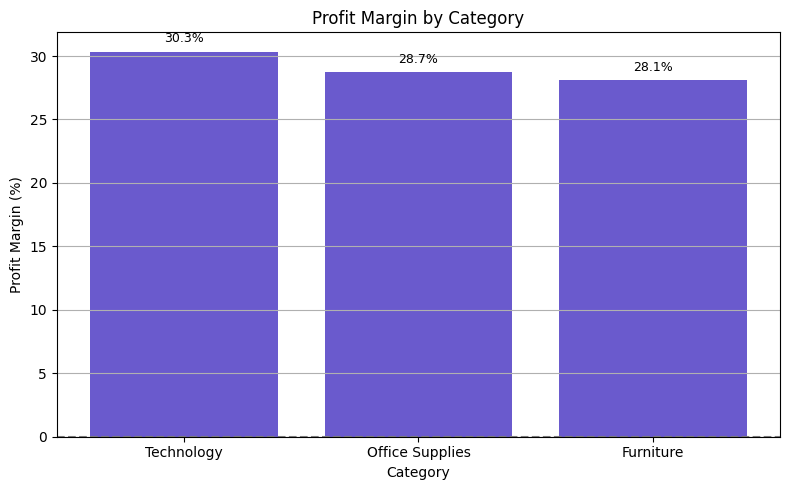

In [5]:
# Plot a bar chart of profit margin
plt.figure(figsize=(8, 5))

bars = plt.bar(category_summary['Category'], category_summary['Profit Margin (%)'], color='slateblue')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 0.5,
             f'{height:.1f}%',
             ha='center', va='bottom', fontsize=9)

# Add labels and title
plt.title('Profit Margin by Category')
plt.ylabel('Profit Margin (%)')
plt.xlabel('Category')
plt.axhline(y=0, color='gray', linestyle='--')  # shows 0% line
plt.grid(axis='y')
plt.tight_layout()
plt.show()
